<a href="https://colab.research.google.com/github/janjuatest/BinaryClassifications/blob/main/K_nearest_neighbors_and_LG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('KNN_Project_Data')

Read the file

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


Stats for the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


We have 10 data columns and 1 column for target class

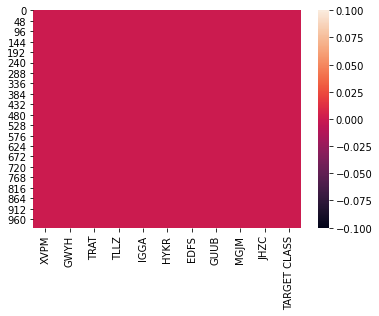

In [7]:
sns.heatmap(df.isnull())

In [9]:
df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


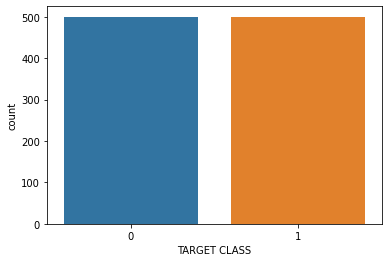

In [10]:
sns.countplot(df['TARGET CLASS'])

Data is fully balanced

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

df_scaled=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [14]:
df_scaled

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

We have now noramlized the data to mean of zero and variance of 1

In [15]:
dfs=pd.DataFrame(data=df_scaled,columns=df.drop('TARGET CLASS',axis=1).columns)

In [16]:
dfs.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


This is now the normalized data frame

In [17]:
dfs.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.187939e-17,1.662004e-16,7.993606e-18,1.694200e-16,-1.438849e-16,-2.786660e-16,-1.606493e-16,-7.838175e-17,-5.010437e-16,2.364775e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.788339e+00,-2.474303e+00,-2.340083e+00,-3.409927e+00,-2.668575e+00,-3.087121e+00,-2.555607e+00,-2.215822e+00,-2.648319e+00,-2.503543e+00
25%,-7.757873e-01,-7.574735e-01,-7.293713e-01,-6.538711e-01,-6.936419e-01,-6.718168e-01,-7.168625e-01,-7.266069e-01,-7.136450e-01,-6.921254e-01
50%,-2.472083e-02,-3.442255e-02,-1.072910e-02,3.566665e-02,-3.590482e-03,2.911148e-02,8.155695e-03,-8.463946e-02,2.489807e-02,-1.931429e-02
75%,7.308466e-01,7.235137e-01,7.215308e-01,7.386505e-01,6.998930e-01,6.919471e-01,7.032086e-01,6.650219e-01,6.978394e-01,7.253420e-01
max,2.863927e+00,3.009948e+00,2.579241e+00,2.451642e+00,2.465393e+00,2.518753e+00,2.732696e+00,3.198000e+00,3.060964e+00,2.881896e+00


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model1=KNeighborsClassifier(n_neighbors=5)

n_neighbors is a hyper parameter
To classify a point it will average the nearest five points

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(dfs, df['TARGET CLASS'], test_size=0.3, random_state=101)

Test and train split

In [23]:
model1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
predict1=model1.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report

In [26]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       152
           1       0.79      0.78      0.79       148

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



Not bad we have 79% accuracy

In [27]:
error=[]
for i in range(1,50):
    modeli=KNeighborsClassifier(n_neighbors=i)
    modeli.fit(X_train,y_train)
    predicti=modeli.predict(X_test)
    error.append(np.sqrt(mean_squared_error(y_test,predicti)))

Now lets try to optimze the hyper parameter using the code above
WE are doing a sweep of n_neigbbors

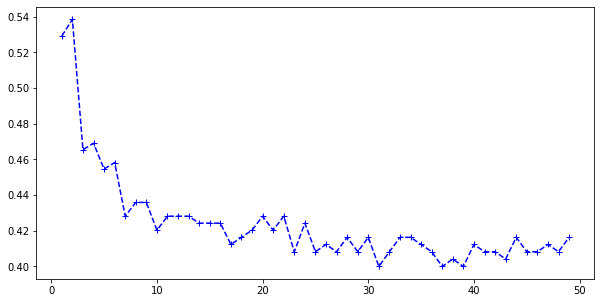

In [28]:
plt.figure(figsize=(10,5))
plt.plot(range(1,50),error,color='blue',marker='+',linestyle='dashed')

Lowest mse error is at 39 neighbors

In [29]:
model39=KNeighborsClassifier(n_neighbors=39)
modeli.fit(X_train,y_train)
predict39=modeli.predict(X_test)
print(classification_report(y_test,predict39))
    

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



83% accuracy achieved

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
modeLG=LogisticRegression()

In [32]:
modeLG.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
predictlg=modeLG.predict(X_test)

In [34]:
print(classification_report(y_test,predictlg))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       152
           1       0.84      0.82      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



LG also gives 83% accuracy 